In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
plt.rcParams.update({'font.size': 20})

from matplotlib.patches import Rectangle
from datetime import datetime
from matplotlib.pyplot import cm

In [6]:
df = pd.read_table('Scotland_metocean_removed.csv', delimiter = ',')
df

,Year,Month,Day,Hour,Hs (m),v10 (m/s)
0,2008,1,1,0,3.446098,6.504866
1,2008,1,1,6,3.337338,7.705570
2,2008,1,1,12,3.195431,7.402196
3,2008,1,1,18,2.971436,6.317548
4,2008,1,2,0,3.067249,7.646887
...,...,...,...,...,...,...
14595,2017,12,30,18,4.619158,10.236058
14596,2017,12,31,0,4.509621,7.472284
14597,2017,12,31,6,3.979025,6.199845
14598,2017,12,31,12,3.666209,11.561856


# Datetime & Zoom-in example

In [9]:
# Use pd.to_datetime to convert columns to datetime object
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
date = df.iloc[:,0:4]
date = np.array(pd.to_datetime(date))

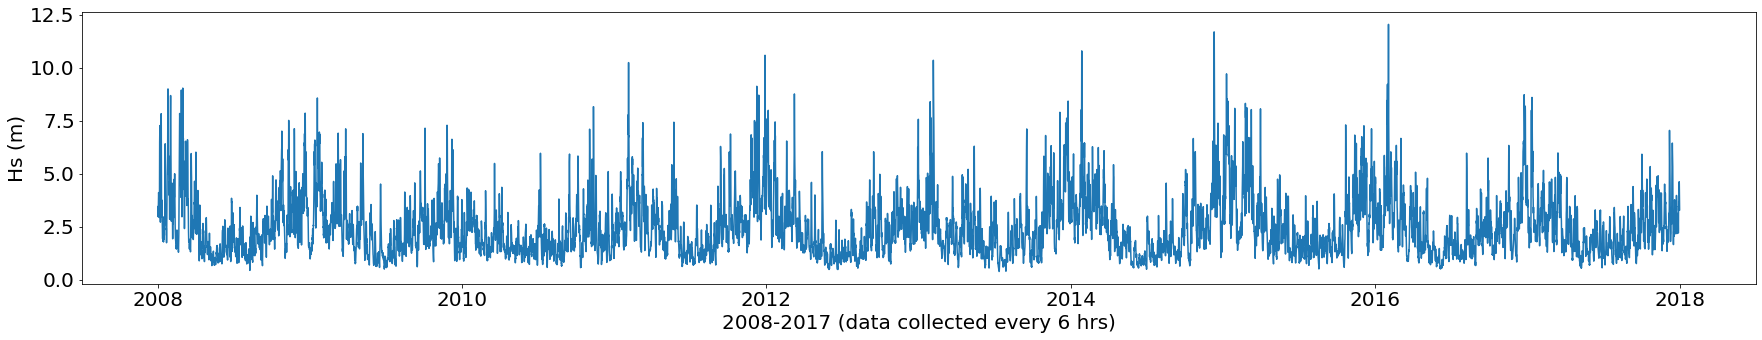

In [11]:
# Assing x = date, y = df to plot with datetime
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.figure(figsize=[30,5])
plt.plot(date,df.iloc[:,4])
plt.ylabel('Hs (m)')
plt.xlabel('2008-2017 (data collected every 6 hrs)')
plt.show()

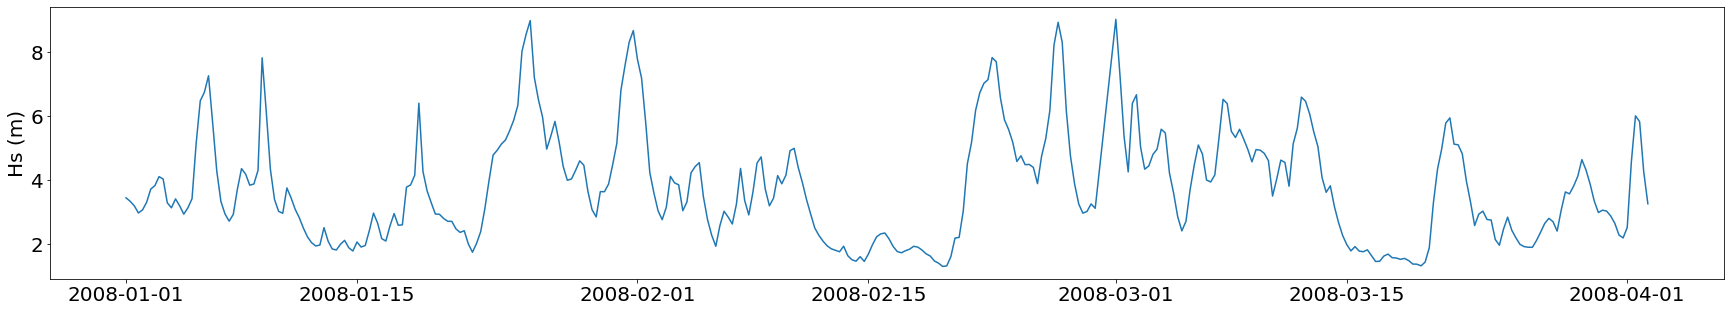

In [13]:
# Set the index to use slice of the date
# e.g. date[:366] and df.iloc[:366,4]
plt.figure(figsize=[30,5])
plt.plot(date[:366],df.iloc[:366,4])
plt.ylabel('Hs (m)')
plt.show()

# One Week Window Size, Hs Multiple Motifs


In [35]:
m = 28 # set window size
mp = stumpy.stump(df.iloc[:,4],m) # calculate matrix profile 

In [45]:
# np.unique: extract only one idx of pair, it automatically sort the return
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
motif_idx = np.array([],dtype=np.int)
for i in np.unique(mp[:,0]):
    motif_idx = np.append(motif_idx,np.where(mp[:,0] == i)[0][0])
nearest_neighbor_idx = mp[motif_idx, 1]

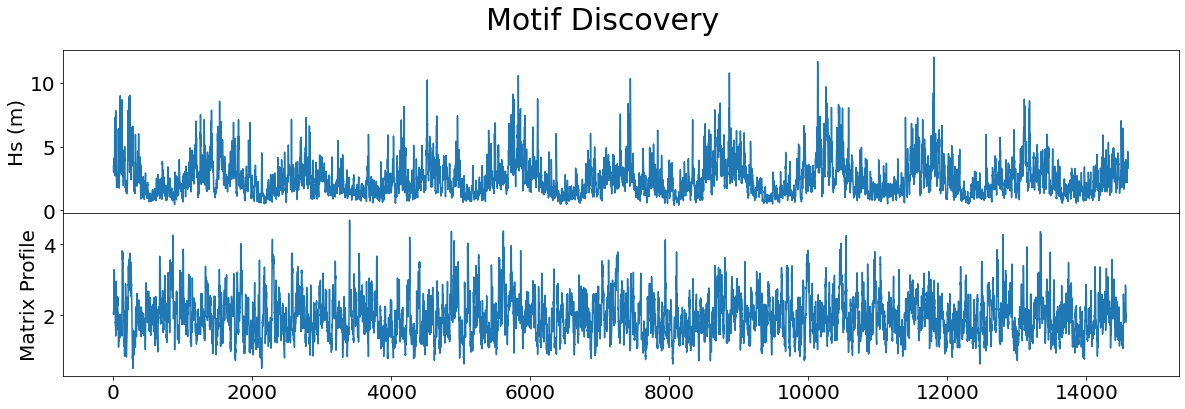

In [70]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, 6])
plt.suptitle('Motif Discovery', fontsize='30')
axs[0].plot(df.iloc[:,4].values)
axs[0].set_ylabel('Hs (m)', fontsize='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].plot(mp[:, 0])
plt.show()

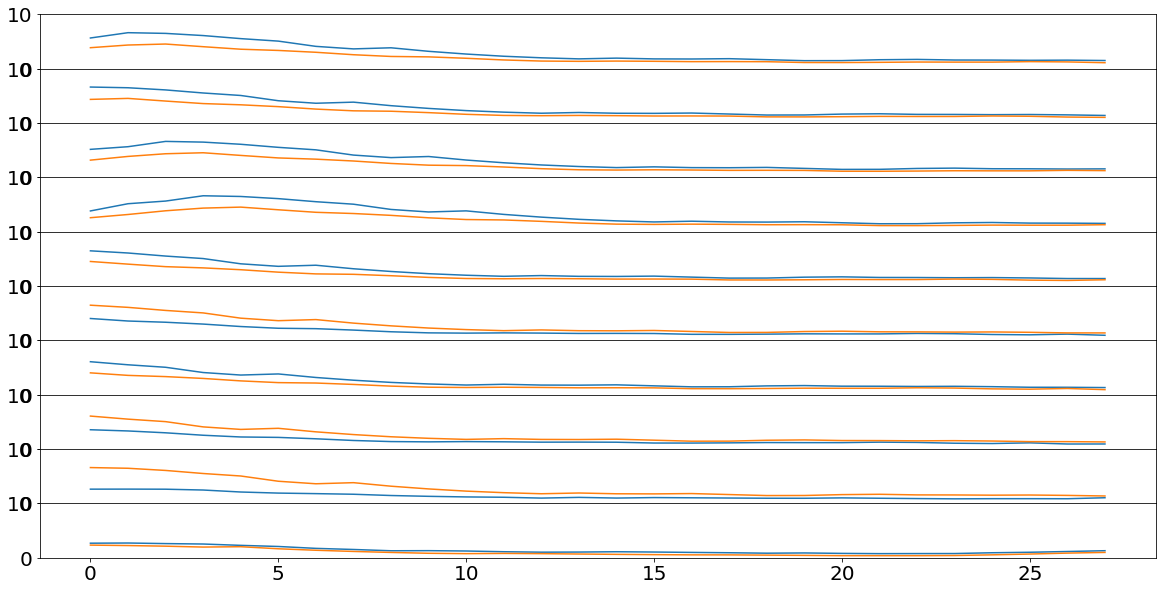

In [78]:
# plot first k nearest pairs
k = 10
fig, axs = plt.subplots(k, sharex=True, gridspec_kw={'hspace': 0}, figsize = [20, k])
for i in range(k):
    axs[i].plot(range(m),df.iloc[motif_idx[i]:motif_idx[i]+m,4])
    axs[i].plot(range(m),df.iloc[nearest_neighbor_idx[i]:nearest_neighbor_idx[i]+m,4])
    axs[i].set_ylim([0,10])
plt.show()